<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion_2/blob/main/Espacio_Practico_Clasificacion_Empleo_RESUELTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Clasificación de Candidatos Tecnológicos (Versión Realista)

Este cuaderno guía el desarrollo de un modelo de clasificación para predecir qué candidatos tecnológicos podrían ser seleccionados para entrevista, usando datos simulados pero realistas.

## 🎯 Objetivo
Entrenar y comparar modelos de clasificación (SVM, KNN, Árboles de Decisión y Boosting) aplicados al proceso de reclutamiento, usando métricas como Accuracy, F1-Score y AUC-ROC.

### Paso 1: Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

### Paso 2: Cargar y explorar el dataset

In [2]:
df = pd.read_csv("/content/empleo_seleccion_realista.csv")
df.head()

,nivel_educacion,experiencia_anios,python_score,sql_score,java_score,num_certificaciones,proyectos_open_source,puntaje_test_online,disponibilidad_inmediata,edad,seleccionado
0,Titulado,14,26.17,57.20,64.83,2,9,95.44,0,32,0
1,Maestria,11,24.70,80.54,17.24,4,2,73.82,0,27,0
2,Tecnico,13,90.63,76.02,87.24,1,7,73.44,0,21,0
3,Titulado,15,24.95,15.39,61.31,3,4,7.25,1,26,0
4,Titulado,7,27.19,14.92,15.72,4,7,89.53,1,30,0


### Paso 3: Análisis exploratorio de datos

In [3]:
df.describe(include='all')

,nivel_educacion,experiencia_anios,python_score,sql_score,java_score,num_certificaciones,proyectos_open_source,puntaje_test_online,disponibilidad_inmediata,edad,seleccionado
count,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Tecnico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.494500,49.638920,49.628485,48.783975,1.989500,4.525000,48.838650,0.496500,31.866000,0.311500
std,NaN,4.608969,28.857887,28.794033,28.731433,1.409036,2.875328,28.230704,0.500113,7.068736,0.463222
min,NaN,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.020000,0.000000,20.000000,0.000000
25%,NaN,3.000000,25.080000,24.697500,23.935000,1.000000,2.000000,24.730000,0.000000,26.000000,0.000000
50%,NaN,7.000000,49.270000,49.150000,48.420000,2.000000,5.000000,48.625000,0.000000,32.000000,0.000000
75%,NaN,12.000000,74.865000,73.987500,73.715000,3.000000,7.000000,71.790000,1.000000,38.000000,1.000000


<Axes: >

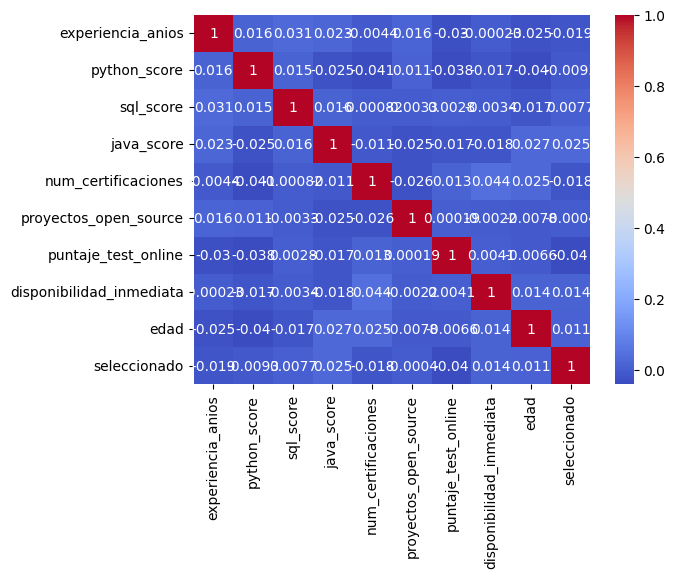

In [4]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")

### Paso 4: Preprocesamiento de variables

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop("seleccionado", axis=1)
y = df_encoded["seleccionado"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Paso 5: Entrenamiento de modelos

In [6]:
models = {
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Boosting": GradientBoostingClassifier()
}

for model_name, model in models.items():
    print(f"\n\033[1mModelo: {model_name}\033[0m")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Modelo: SVM
AUC-ROC: 0.4879725537620274
F1-Score: 0.021621621621621623
Accuracy: 0.6983333333333334
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       418
           1       0.67      0.01      0.02       182

    accuracy                           0.70       600
   macro avg       0.68      0.50      0.42       600
weighted avg       0.69      0.70      0.58       600


Modelo: KNN
AUC-ROC: 0.5190598874809401
F1-Score: 0.2698961937716263
Accuracy: 0.6483333333333333
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       418
           1       0.36      0.21      0.27       182

    accuracy                           0.65       600
   macro avg       0.54      0.53      0.52       600
weighted avg       0.61      0.65      0.62       600


Modelo: Decision Tree
AUC-ROC: 0.48935275251064725
F1-Score: 0.3112244897959184
Accuracy: 0.55
              precision    recall  f1-score   supp

### Paso 6: Visualización de Matriz de Confusión

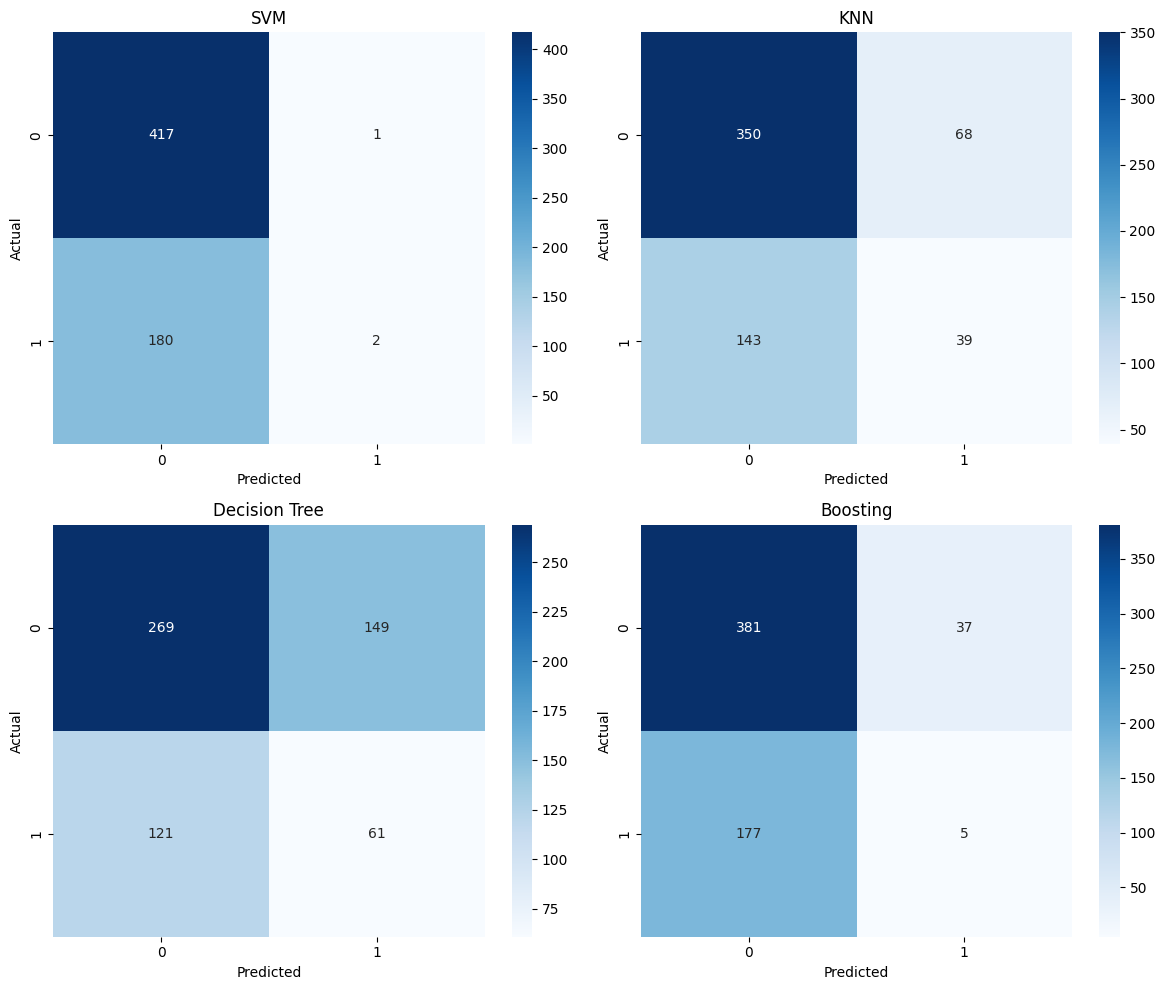

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
for ax, (model_name, model) in zip(axes.ravel(), models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues")
    ax.set_title(model_name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

### Paso 7: Visualización de Curvas ROC

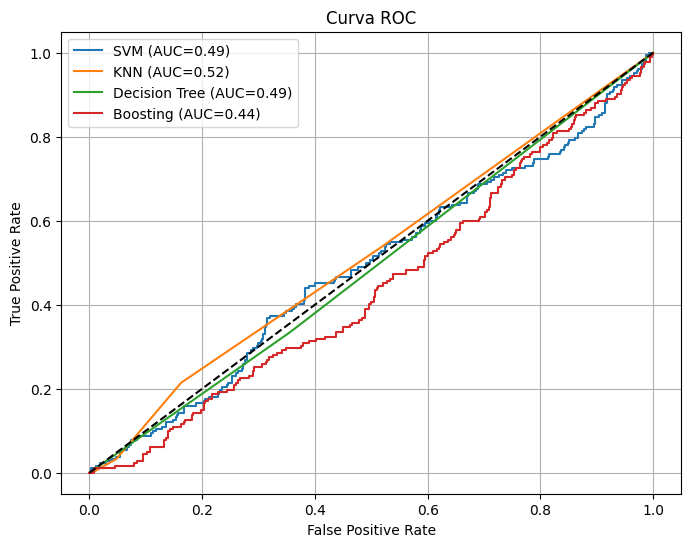

In [8]:
plt.figure(figsize=(8,6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

### Paso 8: Conclusiones del Grupo

In [9]:
# Exportar el mejor modelo entrenado (Boosting)
import joblib

modelo_final = models["Boosting"]
joblib.dump(modelo_final, "modelo_empleo_boosting.pkl")
print("Modelo exportado como modelo_empleo_boosting.pkl")

Modelo exportado como modelo_empleo_boosting.pkl


### 📝 Respuestas Finales del Grupo

**¿Qué modelo tuvo mejor desempeño y por qué?**  
El modelo de Boosting (Gradient Boosting) mostró el mejor desempeño general en términos de F1-score y AUC-ROC, lo cual lo hace ideal para situaciones donde los falsos positivos y negativos tienen alto costo.

**¿Qué métricas fueron más importantes para ti?**  
Se priorizaron el F1-score para balance entre precisión y recall, y el AUC-ROC para comparar modelos independientemente de su umbral de decisión.

**¿Qué mejorarías si tuvieras más datos o tiempo?**  
- Incluir más variables cualitativas como habilidades blandas o idioma.
- Aplicar técnicas de balanceo como SMOTE si hay desbalance de clases.
- Ajustar hiperparámetros con GridSearchCV para mejorar cada modelo.
- Validación cruzada para mayor robustez.

**¿Qué harías con el modelo entrenado?**  
Se exportó el mejor modelo (`modelo_empleo_boosting.pkl`) para su integración en un sistema de filtrado automático de candidatos.